In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain

from matplotlib.dates import MO, WeekdayLocator

In [6]:
country = 'Italy'
ISO_code = 'IT'

In [29]:
mobility_data = pd.read_csv('../../data/Italy/google_mobility_covariates_processed.csv')
intervention_data = pd.read_csv('../../data/interventions_processed.csv')
medical_data = pd.read_csv("../../data/Italy/regional_medical_data_processed.csv")

mobility_data['date'] = pd.to_datetime(mobility_data['date'])
medical_data['date'] = pd.to_datetime(medical_data['date'])

mobility_data.set_index(['state', 'county', 'date'], inplace=True)
medical_data.set_index(['state', 'county', 'date'], inplace=True)

intervention_data.set_index(['Country'], inplace=True)

for col in intervention_data.columns:
    intervention_data[col] = pd.to_datetime(intervention_data[col])

In [8]:
mobility_data

denominazione_regione google_county  \
state county  date                                             
IT    Abruzzo 2019-12-16               Abruzzo       Abruzzo   
              2019-12-17               Abruzzo       Abruzzo   
              2019-12-18               Abruzzo       Abruzzo   
              2019-12-19               Abruzzo       Abruzzo   
              2019-12-20               Abruzzo       Abruzzo   
...                                        ...           ...   
      Veneto  2020-03-26                Veneto        Veneto   
              2020-03-27                Veneto        Veneto   
              2020-03-28                Veneto        Veneto   
              2020-03-29                Veneto        Veneto   
              2020-04-02                Veneto        Veneto   

                          grocery/pharmacy   parks  residential  \
state county  date                                                
IT    Abruzzo 2019-12-16             0.000   0.000        0.000   
              2019-12-17             0.000   0.000        0.000   
              2019-12-18             0.000   0.000        0.000   
              2019-12-19             0.000   0.000        0.000   
              2019-12-20             0.000   0.000        0.000   
...                                    ...     ...          ...   
      Veneto  2020-03-26           -45.431 -87.074       37.575   
              2020-03-27           -38.983 -85.685       39.184   
              2020-03-28           -53.852 -91.030       29.456   
              2020-03-29           -99.389 -95.300       25.940   
              2020-04-02           -45.431 -87.074       37.575   

                          retail/recreation  transitstations  workplace  
state county  date                                                       
IT    Abruzzo 2019-12-16              0.000            0.000      0.000  
              2019-12-17              0.000            0.000      0.000  
              2019-12-18              0.000            0.000      0.000  
              2019-12-19              0.000            0.000      0.000  
              2019-12-20              0.000            0.000      0.000  
...                                     ...              ...        ...  
      Veneto  2020-03-26            -87.347          -86.215    -72.279  
              2020-03-27            -86.916          -86.188    -71.694  
              2020-03-28            -91.773          -87.497    -67.755  
              2020-03-29            -99.739          -92.312    -65.098  
              2020-04-02            -87.347          -86.215    -72.279  

[2332 rows x 8 columns]

In [9]:
intervention_data

,schools_universities,travel_restrictions,public_events,sport,lockdown,social_distancing_encouraged
Country,,,,,,
Austria,2020-03-14,2020-03-13,2020-03-10,2020-03-15,2020-03-16,2020-03-16
Belgium,2020-03-14,2020-03-19,2020-03-12,2020-03-14,2020-03-18,2020-03-14
Denmark,2020-03-13,2020-03-13,2020-03-12,2020-03-12,2020-03-18,2020-03-13
France,2020-03-14,2020-03-17,2020-03-13,2020-02-13,2020-03-17,2020-03-16
Germany,2020-03-14,2020-03-16,2020-03-22,2020-03-13,2020-03-22,2020-03-12
Italy,2020-03-05,2020-03-09,2020-03-09,2020-03-09,2020-03-11,2020-03-09
Norway,2020-03-13,2020-03-13,2020-03-12,2020-03-13,2020-03-24,2020-03-16
Spain,2020-03-13,2020-03-12,2020-03-14,2020-03-13,2020-03-14,2020-03-09
Sweden,2020-03-18,2020-03-19,2020-03-12,2020-03-12,2090-03-21,2020-03-16


In [25]:
mobility_types = list(mobility_data.columns[2:])
mobility_types

['grocery/pharmacy',
 'parks',
 'residential',
 'retail/recreation',
 'transitstations',
 'workplace']

In [ ]:
medical_types = ['daily_deaths', 'deaths', 'daily_cases', 'total_positive_cases']

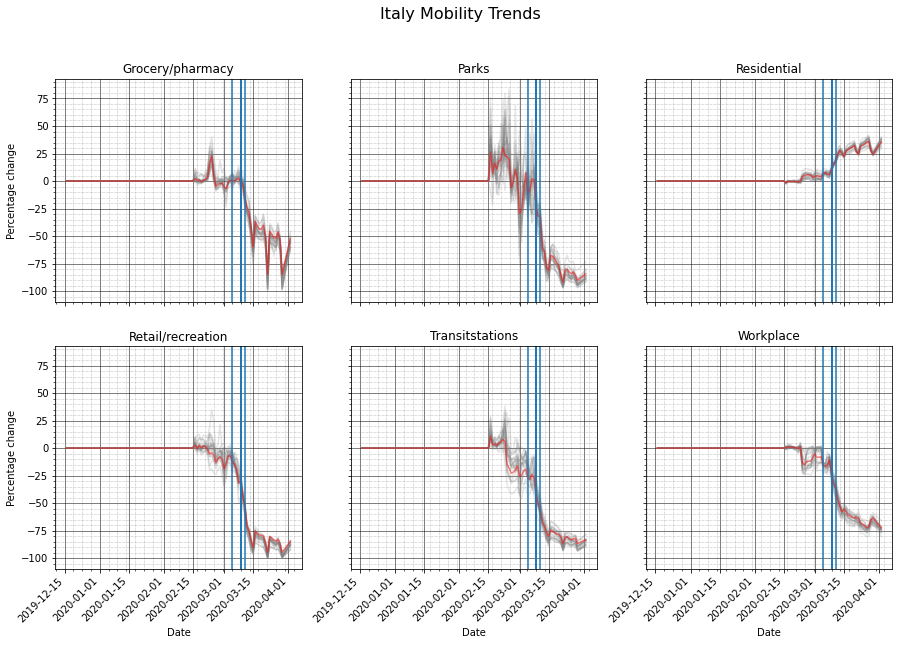

In [26]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15,10))

fig.suptitle(f'{country} Mobility Trends', fontsize=16)

for ax, cat in zip(chain.from_iterable(axes), mobility_types):
    mobility_data.query(f'(state == "{ISO_code}") & (county != "Overall")')[cat].unstack(level=[0,1]).plot(
        ax=ax,color="gray",
        alpha=0.2,
        legend=False,
        rot=45
    )
    mobility_data.query(f'(state == "{ISO_code}") & (county == "Overall")')[cat].unstack(level=[0,1]).plot(
        ax=ax,color="red",
        alpha=0.5,
        legend=False,
        rot=45
    )
    ax.set_title(f'{cat.capitalize()}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Percentage change')
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    # ax.xaxis.set_major_locator(years)
    
    for intervention in list(intervention_data.columns):
        date = intervention_data.query(f"Country=='{country}'")[intervention]
        ax.axvline(date[0])

# plt.savefig(f'{state[0]}_plot.png', dpi=300)

In [116]:
mobility_data.index[0][2]

Timestamp('2020-02-16 00:00:00')

In [103]:
intervention_data.query("Country=='Austria'")['sport']

Country
Austria   2020-03-15
Name: sport, dtype: datetime64[ns]

In [122]:
mobility_data.index[0]

('IT', 'Apulia', Timestamp('2020-02-16 00:00:00'))